<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">ADAM (and Eve ?) - towards optimization of Neural Networks</div>

1. [Why optimizing a Neural Network ?](#sec1)
2. [Optimizers types](#sec2)
3. [ADAM optimizer](#sec3)
4. [ADAM for Neural Networks](#sec4)
5. [AdaMax](#sec5)
6. [Convergence of ADAM](#sec6)
7. [Comparison and Conclusions](#sec7)
8. [Bibliography](#sec8)

# 1. <a id="sec1"></a> Why optimizing a Neural Network ?

<p style = "text-indent: 2.5em;"><b>Optimizers</b> are algorithmes or methods which are used to correct / modify the attributes of a Neural Network, such as: wieghts, learning rate ou reducing the loss. Optimization algorithms or strategies are responsible for reducing the losses and to provide the most accurate results possible. The optimization algorithm chosen by a deep learning practitioner determines the training speed and the final predictive performance of their model, which proves the importance of the subject discussed in this notebook. </p>
<p style = "text-indent: 2.5em;">Here we will look closely at some most common optimizers suc as Gradient Descent and ADAM (with some of it's derivatives).  We will look at some properties of optimizers as well as their utility? Then, we will move to ADAM optimizer and will try to use it on some toy examples. We will then continue with comparison of some common optimizers and will try make a conclusion on which optimizer to use for specific models.  </p>

<img src="img/optimizer.png" width="600px"></img>

# 2. <a id="sec2"></a> Optimizers types

An **Optimizer** is a method or algorithm to update the various parameters that can reduce the loss in much less effort.

Some of optimizers :
- gradient descent
- stochastic gradient descent
- mini-batch gradient descent
- momentum based gradient descent
- Nesterov Accelerated Gradient
- ADAM
- AdaGrad
- AdaMax
- RMSProp
- ...

**Gradient Descent** is one of the most common optimizers that directly uses the derivative of the loss function and learning rate to reduce the loss and achieve the minima. This approach is also adopted in backpropagation in neural networks where the updated parameters are shared between different layers depending upon when the minimum loss is achieved. The weights are updated <i>when the whole dataset gradient is calculated,</i> which slows down the process.
<br>**Stochastic Gradient Descent** is a slightly changed version of the GD method. The parameters are updated on every iteration. It means that after every training sample, the loss function is tested and the model is updated.
<br>**Mini batch GD**, where the model parameters are updated in small batch sizes.

<div class="alert alert-warning">
    
**Question: Which optimizers do you already know ? Which one have you already seen in class ?** <br>
</div>

<div class="alert alert-danger"><a href="#answer1" data-toggle="collapse"><b>Ready to see the answer? (click to expand)</b></a><br>
<div id="answer1" class="collapse">

We've already used SGD and ADAM for sure.
</div>
</div>

<div class="alert alert-warning">
    
**Question: What is loss function ? Give any example of loss function** <br>
</div>

<div class="alert alert-danger"><a href="#answer5" data-toggle="collapse"><b>Ready to see the answer? (click to expand)</b></a><br>
<div id="answer5" class="collapse">

In machine learning, you start by defining a task and a model. The model consists of an architecture and parameters. For a given architecture, the values of the parameters determine how accurately the model performs the task. But how do you find good values? By defining a loss function that evaluates how well the model performs. The goal is to minimize the loss and thereby to find parameter values that match predictions with reality. This is the essence of training.
One intuitive example of loss function may be :
$$L(\theta) = \displaystyle \mathbb{E}_{(x,y)\sim p(x,y)} \left[ \left(f_\theta(x) - y\right)^2 \right] = \int_{x,y} \left[ \left(f_\theta(x) - y\right)^2 \right] \mathrm{d}p(x,y) $$
where $\theta$ are model's parameters, $f_{\theta}$ is a parametric function which defines our neural network with a fixed structure, $y$ is the output of our NN, $p(x, y)$ - probability distribution of data points $(x, y)$
    
</div>
</div>

<div class="alert alert-success">
    
**Cost funtion**<br> 
Note that the loss $L$ takes as input a single example, so minimizing it doesn’t guarantee better model parameters for other examples.

It is common to minimize the average of the loss computed over the entire training data set: $J=\frac{1}{m}\sum_{i=1}^{m} L^{(i)}$. We call this function the cost. $m$ is the size of the training data set and $L^{(i)}$ is the loss of a single training example.
</div>

<img src="./img/kdnuggets.png" width="600px"></img>

# 3. <a id="sec3"></a> ADAM Optimizer

<p style = "text-indent: 2.5em;"><b>Adaptive Moment Estimation (Adam)</b> is a first-order gradient-based optimization of stochastic  objective  functions,  based  on  adaptive  estimates  of  lower-order  moments. In addition to storing an exponentially decaying average of past squared gradients ($v_{t}$), like Adadelta and RMSprop, Adam also keeps an exponentially decaying average of past gradient ($m_{t}$), similar to momentum. Whereas momentum can be seen as a ball running down a slope, Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface. Adam’s method, considered as a method of Stochastic Optimization, is a technique implementing adaptive learning rate. Whereas in normal SGD the learning rate has an equivalent type of effect for all the weights/parameters of the model.</p>

Two principal components of ADAM optimizer:
<ul>
    <li> Momentum
    <li> Adaptive Learning Rate
</ul>

**Momentum**: N-th moment of a random variable is defined as the expected value of that variable to the power of n. More formally:
<br><br>$$m_{n} = E[X_{N}]$$<br>
**Adaptive Learning Rate**: We start off with big steps and finish with small steps – almost like mini-golf. We are then allowed to move faster initially. As the learning rate decays, we take smaller and smaller steps, allowing us to converge faster, since we don't overstep the local minimum with as big steps.

<br>We compute the decaying averages of past and past squared gradients $m_{t}$ and $v_{t}$ respectively as follows:

$$m_{t} = \beta_{1}m_{t-1} + (1 - \beta_{1})g_{t}$$
$$v_{t} = \beta_{2}v_{t-1} + (1 - \beta_{2})g_{t}^2$$
<br>
<ul>
        <li><b>$m_{t}$</b> - 'moving' average of the gradient and the estimate of $1^{st}$ moment (the mean) </li> 
        <li><b>$v_{t}$</b> - squared gradient and the estimate of $2^{d}$ raw moment (the uncentered variance)  </li>
        <li><b>$\beta_{1}$</b> and <b>$\beta_{2}$</b> - control the exponential decay rates of these averages ($m_{t}$ and $v_{t}$) </li> 
</ul>
        As $m_{t}$ and $v_{t}$ are initialized as vectors of 0's, the authors of Adam observe that they are biased towards zero, especially during the initial time steps, and especially when the decay rates are small (i.e. β1 and β2 are close to 1).

<div class="alert alert-warning">
    
**Question: What is t ?** <br>
</div>

<div class="alert alert-danger"><a href="#answer4" data-toggle="collapse"><b>Ready to see the answer? (click to expand)</b></a><br>
<div id="answer4" class="collapse">

t is the timestamp. 
</div>
</div>

<div class="alert alert-warning">
    
**Question: What is $g_{t}$ ?** <br>
</div>

<div class="alert alert-danger"><a href="#answer2" data-toggle="collapse"><b>Ready to see the answer? (click to expand)</b></a><br>
<div id="answer2" class="collapse">

It is $g_{t}$ is the gradient. $g_{t}$ = $\nabla J(\theta_{t,i})$, where J - is the objective function we are trying to optimize (also called cost function).
</div>
</div>

<div class="alert alert-warning">
    
**Question:How can you intuitively explain $\beta_{1}$ and $\beta_{2}$ ?** <br>
</div>

<div class="alert alert-danger"><a href="#answer3" data-toggle="collapse"><b>Ready to see the answer? (click to expand)</b></a><br>
<div id="answer3" class="collapse">

These hyperparameters define the speed of moving averages 'degradation'. 
    
</div>
</div>

<br>This initialization bias can be easily counteracted by computing bias-corrected **first and second moment estimates:**

$$\hat{m_{t}} = \frac{m_{t}}{1 - \beta_{1}^t}$$
$$\hat{v_{t}} = \frac{v_{t}}{1 - \beta_{2}^t}$$

<br>Finally, to update the parameters we use the Adam **update rule:**

$$\theta_{t+1} = \theta_{t} - \frac{\eta}{\sqrt{\hat{v_{t}}}+ \epsilon}m_{t}$$

<b>The authors propose default values: </b>
- $\beta_{1}$ = 0.9 
- $\beta_{2}$ = 0.999
- $\epsilon$ = $10^{-8}$
- $\eta$ is the step size, depends on the iteration. 

The authors show empirically that Adam works well in practice and compares favorably to other adaptive learning-method algorithms. 

## 3.1 Adam's update rule

An important property of Adam’s update rule is its careful choice of stepsizes. Assuming $\epsilon$= 0, the effective step taken in parameter space at timestep $t$ is $$\Delta_{t} = \alpha \cdot{ \frac{\hat{m_{t}}}{\sqrt{\hat{v_{t}}}}}$$

With  a  slight  abuse  of  terminology,we will call the $ \frac{\hat{m_{t}}}{\sqrt{\hat{v_{t}}}}$ thesignal-to-noiseratio (SNR).  With a smaller SNR the effective stepsize $\Delta_{t}$ will be closer to zero.  This is a desirable property,  since a smaller SNR means that there is greater uncertainty about whether the direction of $m_{t}$ corresponds to the direction of the true gradient.  For example, the SNR value typically becomes closer to 0 towards an optimum, leading to smaller effective steps in parameter space: a form of automatic annealing. The effective stepsize $\Delta_{t}$ is also invariant to the scale of the gradients.

<div class="alert alert-warning">
    
**Difficult question: Try to find the upper bounds for $\Delta_{t}$** <br>
</div>

<div class="alert alert-danger"><a href="#answer7" data-toggle="collapse"><b>Ready to see the answer? (click to expand)</b></a><br>
<div id="answer7" class="collapse">

$$ \Delta_{t} = \alpha \cdot{ \frac{\frac{m_{t}}{1 - \beta_{1}^t}}{\sqrt{\frac{v_{t}}{1 - \beta_{2}^t}}}} = \alpha \cdot{\frac{ \beta_{1}m_{t-1} + (1 - \beta_{1})g_{t}} {1 - \beta_{1}^t}}{\sqrt{\frac{1 - \beta_{2}^t}{\beta_{2}v_{t-1} + (1 - \beta_{2})g_{t}^2}}} $$
    
<br> If $(1 - \beta_{1}) > \sqrt{1 - \beta_{2}}$, then after developement $\beta_{2} > 2\beta_{1} - \beta_{1}^2$, so $\beta_{1} < \beta_{2}$.
    
Then, we will use this developpement :
<img src="./img/m_proof_1-transparent.png" width="400px"></img>
Those, we can rewrite the $m_{t}$ definition as:
<img src="./img/m_proof_2-transparent.png" width="200px"></img> We will use the same property for $v_{t}$.
Thus, the only thing we have to show is that 
<img src="./img/m_proof_3-transparent.png" width="300px"></img>

$\Delta_{t} \leq \alpha \cdot{\frac{1 - \beta_{1}}{\sqrt{1 - \beta_{2}}}}$, if $(1 - \beta_{1}) > \sqrt{1 - \beta_{2}}$, <br>$\Delta_{t} \leq \alpha$, otherwise
    
</div>
</div>

## 3.2 Choice of hyperparameters

The choice of hyperparameters heavily affects the trainig. Here is some visualization for ADAM performances depending on it's hyperparameters choice. Visualization is created according to pytorch Adam method: Adam(learning_rate, $\beta_{1}$, $\beta_{2}$, $\epsilon$)
<img src="./img/adam cours.gif" width="1000px"></img> 


<h2>Let's look on how this works on practice :)</h2>
    
We are going to look at how ADAM optimizer works on simple classification problem. Here we have 2 datasets, which couldn't be classified linerly. We create though the expand method, which will serve us to add an additional dimension to our dataset, so that they can be seperated through this third dimension.

In [25]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 6]
import os

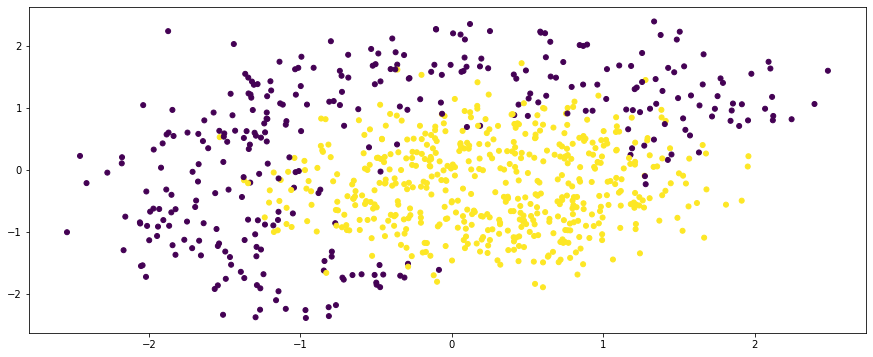

In [26]:
with open('data/train.npy', 'rb') as fin:
    X = np.load(fin)
    
with open('data/target.npy', 'rb') as fin:
    y = np.load(fin)
fig,ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=y, s=25)
plt.show()

In [34]:
from IPython import display

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
count = 0

def visualize(X, y, w, history,folder_name=None):
    """draws classifier prediction with matplotlib magic"""
    global count
    Z = probability(expand(np.c_[xx.ravel(), yy.ravel()]), w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z,  cmap='RdGy')
    plt.colorbar()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.subplot(1, 2, 2)
    plt.plot(history)
    plt.grid()
    if not os.path.exists(f"imgs/{folder_name}"):
        os.makedirs(f"imgs/{folder_name}")
    plt.savefig(f"imgs/{folder_name}/{folder_name}+{count}.png")
    count += 1
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    plt.show()

In [35]:
def expand(X):
    """
    Adds quadratic features. 
    This expansion allows your linear model to make non-linear separation.
    
    For each sample (row in matrix), compute an expanded row:
    [feature0, feature1, feature0^2, feature1^2, feature0*feature1, 1]
    
    :param X: matrix of features, shape [n_samples,2]
    :returns: expanded features of shape [n_samples,6]
    """
    X_expanded = np.zeros((X.shape[0], 6))
    
    # TODO:<your code here>
    X_expanded[:,[0,1]] = X
    X_expanded[:,[2,3]] = np.square(X)
    X_expanded[:,4] = np.multiply(X[:,0],X[:,1])
    X_expanded[:,5] = 1
    
    return X_expanded

X_expanded = expand(X)

In [36]:
def compute_grad(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute vector [6] of derivatives of L over each weights.
    Keep in mind that our loss is averaged over all samples (rows) in X.
    """
    p = probability(X,w)
    p_y = p-y
    grad = np.matmul(np.transpose(X),p_y)
    grad_avg = grad/X.shape[0]
    return grad_avg

In [37]:
def probability(X, w):
    """
    Given input features and weights
    return predicted probabilities of y==1 given x, P(y=1|x), see description above
        
    Don't forget to use expand(X) function (where necessary) in this and subsequent functions.
    
    :param X: feature matrix X of shape [n_samples,6] (expanded)
    :param w: weight vector w of shape [6] for each of the expanded features
    :returns: an array of predicted probabilities in [0,1] interval.
    """
    wX = np.exp(-1 * np.dot(w,np.transpose(X)))
    return 1/(1 + wX)

In [38]:
def compute_loss(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute scalar loss function L using formula above.
    Keep in mind that our loss is averaged over all samples (rows) in X.
    """
    # TODO:<your code here>
    cross_entropy =  -1 * (y * np.log(probability(X,w)) + (1-y)* np.log(1 - probability(X,w)))
    return np.sum(cross_entropy)/cross_entropy.shape[0]

## Learning rate = 0.001
    


<div class="alert alert-warning">
    
**Complete the code below according to the theory seen above.** <br>
</div>

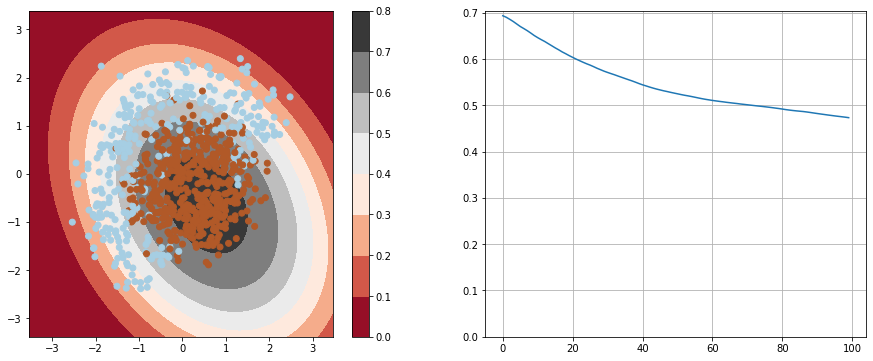

<Figure size 1080x432 with 0 Axes>

In [39]:
# please use np.random.seed(42), eta=0.001, alpha=0.9, n_iter=100 and batch_size=4 for deterministic results

np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

eta = 0.001 # learning rate
beta_1 = 0.9 
beta_2 = 0.999
eps = 1e-7
m_t = np.zeros_like(w)
v_t = np.zeros_like(w)

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size,)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss,  "adam_lr_0.001")

    batch_grad = compute_grad(X_expanded[ind],y[ind],w)
    
    #TODO : your code here :)
    #
    #
    #bias correction
    #
    #
    
    m_t = beta_1 * m_t + (1-beta_1) * batch_grad
    v_t = beta_2 * v_t + (1-beta_2) * np.square(batch_grad)
    m_t_hat = m_t / (1 - np.power(beta_1,i+1))
    v_t_hat = v_t / (1 - np.power(beta_2,i+1))
    
    w = w - (((eta)/(np.sqrt(v_t) + eps)) * m_t)
     

visualize(X, y, w, loss, "adam_lr_0.001")
plt.clf()

## Learning rate = 0.0001
    


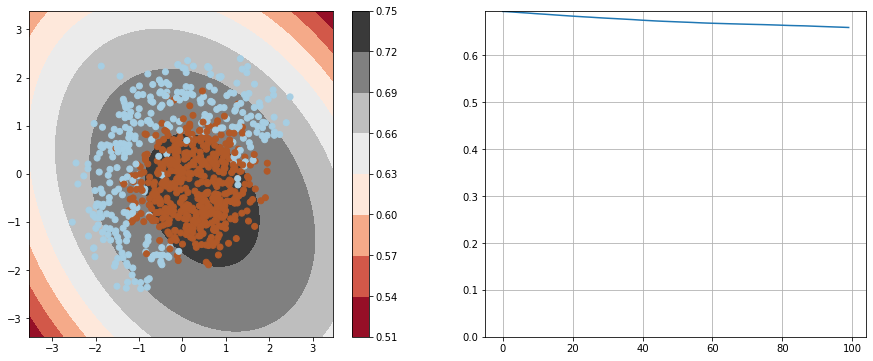

<Figure size 1080x432 with 0 Axes>

In [17]:
# please use np.random.seed(42), eta=0.001, alpha=0.9, n_iter=100 and batch_size=4 for deterministic results

np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

eta = 0.0001 # learning rate
beta_1 = 0.9 
beta_2 = 0.999
eps = 1e-7
m_t = np.zeros_like(w)
v_t = np.zeros_like(w)

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size,)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss,  "adam_lr_0.001")

    batch_grad = compute_grad(X_expanded[ind],y[ind],w)
    
    #TODO : your code here :)
    #
    #
    #bias correction
    #
    #
    
    m_t = beta_1 * m_t + (1-beta_1) * batch_grad
    v_t = beta_2 * v_t + (1-beta_2) * np.square(batch_grad)
    m_t_hat = m_t / (1 - np.power(beta_1,i+1))
    v_t_hat = v_t / (1 - np.power(beta_2,i+1))
    
    w = w - (((eta)/(np.sqrt(v_t) + eps)) * m_t)
     

visualize(X, y, w, loss, "adam_lr_0.001")
plt.clf()

##  Monotonic Decreasing Learning Rate
    


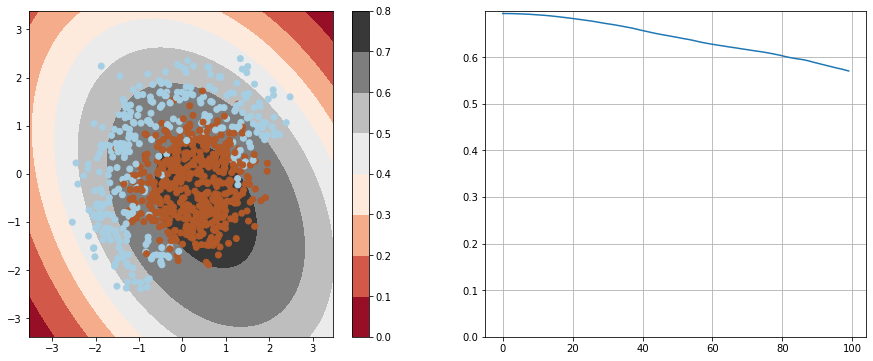

<Figure size 1080x432 with 0 Axes>

In [19]:
# please use np.random.seed(42), eta=0.001, alpha=0.9, n_iter=100 and batch_size=4 for deterministic results

np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

eta = np.linspace(0.00001,0.01,1000) # learning rate
beta_1 = 0.9 
beta_2 = 0.999
eps = 1e-7
m_t = np.zeros_like(w)
v_t = np.zeros_like(w)

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size,)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss,  "adam_lr_0.001")

    batch_grad = compute_grad(X_expanded[ind],y[ind],w)
    
    #TODO : your code here :)
    #
    #
    #bias correction
    #
    #
    
    m_t = beta_1 * m_t + (1-beta_1) * batch_grad
    v_t = beta_2 * v_t + (1-beta_2) * np.square(batch_grad)
    m_t_hat = m_t / (1 - np.power(beta_1,i+1))
    v_t_hat = v_t / (1 - np.power(beta_2,i+1))
    
    w = w - (((eta[i])/(np.sqrt(v_t) + eps)) * m_t)
     

visualize(X, y, w, loss, "adam_lr_0.001")
plt.clf()

##  Comparing with SGD
    


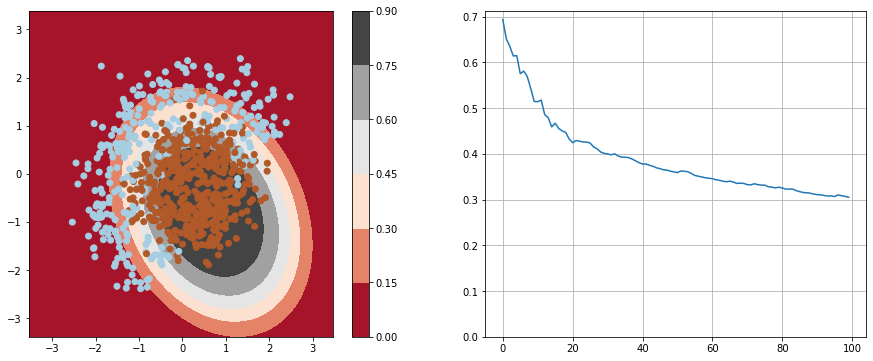

<Figure size 1080x432 with 0 Axes>

In [22]:
# please use np.random.seed(42), eta=0.001, alpha=0.9, n_iter=100 and batch_size=4 for deterministic results

np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])
wSGD = np.array([0, 0, 0, 0, 0, 1])


eta = 0.0001 # learning rate
etaSGD = 0.1
beta_1 = 0.9 
beta_2 = 0.999
eps = 1e-7
m_t = np.zeros_like(w)
v_t = np.zeros_like(w)

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
lossSGD = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss,  "adam_lr_0.001")

    batch_grad = compute_grad(X_expanded[ind],y[ind],w)
    
    #TODO : your code here :)
    #
    #
    #bias correction
    #
    #
    
    m_t = beta_1 * m_t + (1-beta_1) * batch_grad
    v_t = beta_2 * v_t + (1-beta_2) * np.square(batch_grad)
    m_t_hat = m_t / (1 - np.power(beta_1,i+1))
    v_t_hat = v_t / (1 - np.power(beta_2,i+1))
    
    w = w - (((eta)/(np.sqrt(v_t) + eps)) * m_t)     

visualize(X, y, w, loss, "adam_lr_0.001")
plt.clf()

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    
    lossSGD[i] = compute_loss(X_expanded, y, wSGD)
    if i % 10 == 0:
        
        visualize(X_expanded[ind, :], y[ind], wSGD, lossSGD,  "adam_mini_batch_0.1")

  
    batch_gradSGD = compute_grad(X_expanded[ind],y[ind],wSGD)
    
    #TODO : your code here :)
    #
    #
    #bias correction
    #
    #
    wSGD = wSGD - etaSGD * batch_gradSGD

visualize(X, y, wSGD, lossSGD, "adam_mini_batch_0.1")
plt.clf()

In [ ]:
#%load solutions/codeADAM1.py
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

<div class="alert alert-warning">
    
**Exercice 1:**<br>
Try to change the learning rate and see what happens.
<br>**Exercice 2:**<br>
Try to make the learning rate evolutive through time.
</div>

# 4. <a id="sec4"></a> ADAM for Neural Networks

First let’s talk what do you mean by optimising a model. Well simply we want the model to get trained to reach the state of maximum accuracy given resource constraints like time, computing power, memory etc. Optimization has a broad scope and you can also tweak the architecture to get a better model. But that is something which comes with intuition developed by experience.
<br>Given a certain architecture, in pytorch a torch.optim package implements various optimization algorithms. We would discuss here two most widely used optimizing techniques stochastic gradient descent (optim.SGD) and Adam’s Method (optim.Adam).

## 4.1 In Pytorch

From documentation: **torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)**
<br><br> Arguments:
<ul>
    <li>params - is the list of model's parameters to optimize</li>
    <li>lr - is the learning rate $\alpha$ (default 1e-3)</li>
    <li>betas - is a tuple of ($\beta_{1}, \beta_{2}$)</li>
    <li>eps - $\epsilon$, term used to improve numerical stability</li>
    <li>weight_decay - weight decay, penalty (default 0)</li>
    <li>amsgrad - whether to use the AMSgrad variant of ADAM algorithm</li>
</ul>


<div class="alert alert-success">
    
Be sure to install the necessary packages and verify that everything is working by importing everything.
</div>

In [ ]:
!pip install torch torchvision pytorch-ignite

In [ ]:
%matplotlib inline
import itertools
import math
import time
import os
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from IPython import display
from torch.autograd import Variable

In [ ]:
help(torch.optim.Adam)

In [ ]:
# set batch_size
batch_size = 128

# the data, shuffled and split between train and test sets
# we normalize data to have values between -1 and 1
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5]) ])

train_dataset = torchvision.datasets.MNIST(root='../data/', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
train_iterator = iter(train_loader)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        out = self.model(x.view(x.size(0), 784))
        out = out.view(out.size(0), -1)
        return out

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 784),
            nn.Tanh()
        )
    
    def forward(self, x):
        x = x.view(x.size(0), 100)
        out = self.model(x)
        return out

In [ ]:
discriminator = Discriminator()
generator = Generator()

images, _ = next(train_iterator)
images = Variable(images)
real_labels = Variable(torch.ones(images.size(0), 1))

noise = Variable(torch.randn(images.size(0), 100))
fake_images = generator(noise)
fake_labels = Variable(torch.zeros(images.size(0), 1))

d_real = discriminator(images)
d_fake = discriminator(fake_images)
d_real.detach().numpy()[:5], d_fake.detach().numpy()[:5]

In [ ]:
criterion = nn.BCELoss()
criterion(d_real, real_labels), criterion(d_fake, fake_labels)

<div class="alert alert-warning">
<b>Exercice 3:</b><br>
Define ADAM optimizers for both discriminator and generator. Keep attention to betas tuple setting. Don't forget to define the learning rate.
</div>

In [6]:
#%load solutions/ADAM2.py
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

In [ ]:
def train_discriminator(discriminator, images, real_labels, fake_images, fake_labels):
    """
    Arguments:
        discriminator: discriminator model object
        images: a batch of data from the dataset
        real_labels: a vector of ones, size of images
        fake_images: a batch of images generated by the generator
        fake_labels: a vector of zeros, size of fake_images
    Returns:
        d_loss: discriminator loss
        real_output: output of the discriminator on the real images
        fake_output: output of the discrimiator on the fake images
    """
    discriminator.zero_grad()
    outputs = discriminator(images)
    real_loss = criterion(outputs, real_labels)
    real_output = outputs

    outputs = discriminator(fake_images)
    fake_loss = criterion(outputs, fake_labels)
    fake_output = outputs

    d_loss = real_loss + fake_loss
    d_loss.backward()
    d_optimizer.step()
    return d_loss, real_output, fake_output

In [ ]:
def train_generator(generator, discriminator_outputs, real_labels):
    """
    Arguments:
        generator: generator model object
        discriminator_outputs: ouput of the discriminator on a set of values z, D(G(z))
        real_labels: a vector of ones, size of discriminator_outputs
    Returns:
        g_loss: generator loss
    """
    generator.zero_grad()
    g_loss = criterion(discriminator_outputs, real_labels)
    g_loss.backward()
    g_optimizer.step()
    return g_loss

In [ ]:
# Prepare folder to store results
if not os.path.exists('results'):
    os.makedirs('results')
    
# Prepare folder to store models
if not os.path.exists('models'):
    os.makedirs('models')
    
# Draw samples from the input distribution to inspect the generation on training 
num_test_samples = 16
test_noise = Variable(torch.randn(num_test_samples, 100))
# Set number of epochs and initialize figure counter
num_epochs = 4
num_batches = len(train_loader)
# Set counter
num_fig = 0

In [7]:
# Create figure for plotting
size_figure_grid = int(math.sqrt(num_test_samples))
fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(6, 6))
for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
    ax[i,j].get_xaxis().set_visible(False)
    ax[i,j].get_yaxis().set_visible(False)

# Start training
t0 = time.time()
for epoch in range(num_epochs):
    for n, (images, _) in enumerate(train_loader):

        # Convert data to suitable format
        images = Variable(images)
        real_labels = Variable(torch.ones(images.size(0), 1))

        # Sample from generator
        noise = Variable(torch.randn(images.size(0), 100))
        fake_images = generator(noise)
        fake_labels = Variable(torch.zeros(images.size(0), 1))

        # Train the discriminator
        d_loss, real_score, fake_score = train_discriminator(
            discriminator, images, real_labels, fake_images, fake_labels)

        # Sample again from the generator and get output from discriminator
        noise = Variable(torch.randn(images.size(0), 100))
        fake_images = generator(noise)
        outputs = discriminator(fake_images)

        # Train the generator
        g_loss = train_generator(generator, outputs, real_labels)

        # Every half epoch generates pictures with to generator to monitor training
        if (n+1) % int(num_batches/2) == 0:
            # generate pictures
            test_images = generator(test_noise)
            # plot them
            for k in range(num_test_samples):
                i = k//4
                j = k%4
                ax[i,j].cla()
                ax[i,j].imshow(test_images[k,:].data.cpu().numpy().reshape(28, 28),
                               cmap='Greys')
            display.clear_output(wait=True)
            display.display(plt.gcf())

            # save the picture
            plt.savefig('results/mnist-gan-%03d.png'%num_fig)
            num_fig += 1
            # print log
            print('Epoch [%d/%d], Step[%d/%d], d_loss: %.4f, g_loss: %.4f, '
                  'D(x): %.2f, D(G(z)): %.2f, time %.2f min'
                  % (epoch + 1, num_epochs, n+1, num_batches,
                     d_loss.detach().numpy(), g_loss.detach().numpy(),
                     real_score.detach().numpy().mean(),
                     fake_score.detach().numpy().mean(), (time.time()-t0)/60))

        # at the end of n epochs, save the models
        if epoch % 2 == 0:
            torch.save(generator.state_dict(),
                    os.path.join('models', 'generator.pkl'))
            torch.save(discriminator.state_dict(),
                    os.path.join('models', 'discriminator.pkl'))

NameError: name 'math' is not defined

# 5. <a id="sec5"></a> AdaMax

A compléter


# 6. <a id="sec6"></a> Convergence of ADAM

A compléter


# 7. <a id="sec7"></a>Comparison and Conslusions

## 7.1 Some visual results

### 7.1.1 Himmelblaus

Let's look at the result of Himmelblaus Function minimum search with usual Gradient Descent and ADAM algorithms. 
<br>* **Green** - is Gradient Descent (learning rate = 0.001), **Violet** - is ADAM (learning rate = 0.1).
<img src="./img/himmelblaus.png" width="500px"></img>
<img src="./img/deeplearningAI2.png" width="1000px"></img>
<img src="./img/deeplearningAI3.png" width="3000px"></img>

### 7.1.2 MNIST logistic regression

Here we evaluate our proposed method on L2-regularized multi-class logistic regression using the <a href="https://en.wikipedia.org/wiki/MNIST_database ">MNIST dataset</a>. The logistic regression classifies the class label directly on the 784 dimension image vectors.  We compare Adam to accelerated SGD with Nesterov momentum andAdagrad using minibatch size of 128.
<img src="./img/paperMNISTregression.png" width="500px"></img>
We can see here that ADAM converges faster than AdaGrad and a bit faster than stochastic gradient descent.

### 7.1.3 Multi-layer Neural Network

Here we will use a neural network model with two fully connectedhidden layers with 1000 hidden units each and ReLU activation with minibatch size of 128. We also use <a href="https://en.wikipedia.org/wiki/MNIST_database ">MNIST dataset</a>. We compare the effectiveness ofAdam to other stochastic first order methods on multi-layer neural networks trained with dropoutnoise. The figure below shows our results: Adam shows better convergence than other methods.
<img src="./img/paperNN.png" width="500px"></img>

### 7.1.4 CNN

Convolutional neural networks (CNNs) with several layers of convolution, pooling and non-linearunits have shown considerable success in computer vision tasks. Unlike most fully connected neuralnets,  weight  sharing  in  CNNs  results  in  vastly  different  gradients  in  different  layers. A  smaller learning rate for the convolution layers is often used in practice when applying SGD. Our CNN architecture has three alternating stages of 5x5 convolution filters and 3x3 max pooling with stride of 2 that are followed by a fully connected layerof 1000 rectified linear hidden units (ReLU’s). We use here <a href="https://en.wikipedia.org/wiki/CIFAR-10">Cifar10 dataset</a>.
<img src="./img/paperCifar.png" width="500px"></img>
Though Adam shows marginalimprovement over SGD with momentum, it adapts learning rate scale for different layers instead ofhand picking manually as in SGD.

## 7.2 Counter examples

As shown in <a href="https://arxiv.org/pdf/1705.08292.pdf"> Wilson et al., 2017</a>, when a problem has multiple global minima, different algorithms can find entirely different solutions when initialized from the same point. In addition, the authors construct an example where adaptive gradient methods find a solution which has worse out-of-sample error than SGD. 
<img src="./img/paperWilson1.png" width="1000px"></img>
<br>We observe that the solutions found by SGD do indeed generalize better than those found by adaptive methods. They also found that by increasing the step size, we could drive the performance of the adaptive methods down in the first 50 or so epochs, but the aggressive step size made the flatlining behavior worse, and no step decay scheme could fix the behavior.

### 7.2.1 There are still uncertanities

The recent work of <a href="https://arxiv.org/pdf/1910.05446.pdf"> Choi et al., 2019</a> has shown that especially if an optimizer underperforms any of its specializations, we should be skeptical of empirical comparison of optimizers. When we do inevitably compareoptimizers,  we should report search spaces and highlightdecisions about what hyperparameters were tuned when in-terpreting results. All empirical compar-isons of neural network optimizers depend heavily on thehyperparameter tuning protocol, perhaps far more than weare used to with comparisons between model architectures.


## 7.3 Conclusion

<p style = "text-indent: 2.5em;">When ADAM was first introduced, people got very excited about its power. Paper contained some very optimistic charts, showing huge performance gains in terms of speed of training. However, after a while people started noticing that despite superior training time, Adam in some areas does not converge to an optimal solution, so for some tasks (such as image classification on popular CIFAR datasets) state-of-the-art results are still only achieved by applying SGD with momentum. A lot of research has been done since to analyze the poor generalization of Adam trying to get it to close the gap with SGD.</p>
<p style = "text-indent: 2.5em;">Anyway, ADAM is definitely one of the best optimization algorithms for deep learning and its popularity is growing very fast. While people have noticed some problems with using Adam in certain areas, researches continue to work on solutions to bring Adam results to be on par with SGD with momentum. Overall, Adam tends to be robust and well-suited to a wide range of non-convex optimization problems in the field machine learning.</p> 




# 8. <a id="sec8"></a> Bibliography

A compléter
